In [1]:
! pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [211]:
import pandas as pd

In [212]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [213]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [214]:
data.dropna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [215]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [216]:
data.drop_duplicates(inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [217]:
data['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [218]:
data['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [219]:
# Step 1: One-hot encode the 'gender' column
data = pd.get_dummies(data, prefix='gender', columns=['gender'])

# Step 2: Convert the new columns (gender_Female, gender_Male, gender_Other) to integers
for col in data.columns:
    if col.startswith('gender_'):
        data[col] = data[col].astype(int)
data


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,No Info,24.60,4.8,145,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [177]:
# data = pd.get_dummies(data, prefix=['gender'], columns=['gender'])
# data[['gender_Female', 'gender_Male', 'gender_Other']] = data[['gender_Female', 'gender_Male', 'gender_Other']].astype('int64')
# data

In [220]:
data = pd.get_dummies(data, columns=['smoking_history'])
for col in data.columns:
    if col.startswith('smoking_history_'):
        data[col] = data[col].astype(int)
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [221]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [227]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220,0.584122,0.415691,0.000187,0.342053,0.095657,0.041583,0.096717,0.357768,0.066222
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616,0.492875,0.492843,0.013681,0.474400,0.294121,0.199634,0.295574,0.479346,0.248671
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [229]:
data.sample(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
64922,36.0,0,0,27.32,6.5,140,0,1,0,0,1,0,0,0,0,0
6539,50.0,0,0,22.19,5.7,80,0,0,1,0,0,0,0,0,0,1
78663,31.0,0,0,28.87,5.8,85,0,0,1,0,1,0,0,0,0,0
33494,69.0,0,0,33.85,6.8,260,1,1,0,0,0,0,0,1,0,0
89879,49.0,0,0,27.32,6.1,158,0,1,0,0,0,0,0,0,1,0
45329,70.0,0,1,47.55,6.1,145,1,1,0,0,0,1,0,0,0,0
18305,3.0,0,0,21.11,6.1,200,0,0,1,0,1,0,0,0,0,0
9793,23.0,0,0,27.32,4.5,130,0,0,1,0,1,0,0,0,0,0
95121,69.0,0,0,27.32,5.0,145,0,0,1,0,0,0,1,0,0,0
1652,46.0,0,0,29.80,5.0,160,0,0,1,0,0,1,0,0,0,0


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96146 non-null  float64
 1   hypertension                 96146 non-null  int64  
 2   heart_disease                96146 non-null  int64  
 3   bmi                          96146 non-null  float64
 4   HbA1c_level                  96146 non-null  float64
 5   blood_glucose_level          96146 non-null  int64  
 6   diabetes                     96146 non-null  int64  
 7   gender_Female                96146 non-null  int64  
 8   gender_Male                  96146 non-null  int64  
 9   gender_Other                 96146 non-null  int64  
 10  smoking_history_No Info      96146 non-null  int64  
 11  smoking_history_current      96146 non-null  int64  
 12  smoking_history_ever         96146 non-null  int64  
 13  smoking_history_forme

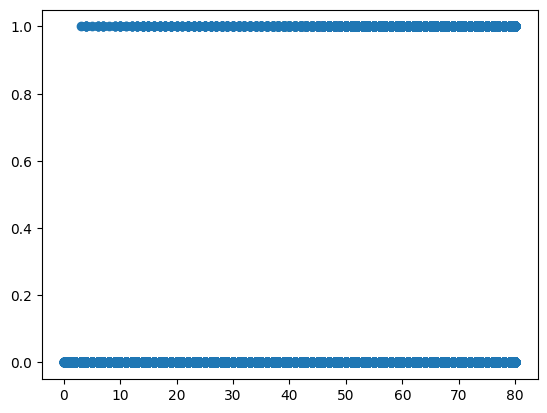

In [226]:
import matplotlib.pyplot as plt

df = data.copy()

plt.scatter(df['age'], df['diabetes'])

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define input (X) and output (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.052627268328857696
R-squared: 0.35415666283864367


In [240]:
The code in your Jupyter Notebook is a machine learning pipeline for predicting diabetes outcomes based on various features. Here's how it works:

1. **Data Preparation**:
    - The dataset is loaded (`data`) and cleaned by handling missing values, duplicates, and categorical variables (e.g., `gender` and `smoking_history`) using one-hot encoding.
    - The dataset is split into input features (`X`) and the target variable (`y`), which represents diabetes outcomes.

2. **Train-Test Split**:
    - The data is divided into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets using `train_test_split`.

3. **Model Training**:
    - A `LinearRegression` model is created and trained on the training data (`X_train`, `y_train`).

4. **Model Evaluation**:
    - The model makes predictions (`y_pred`) on the test set (`X_test`).
    - Metrics like Mean Squared Error (`mse`) and R-squared (`r2`) are calculated to evaluate the model's performance.

5. **Model Persistence**:
    - The trained model is saved to a file (`diabetes_prediction_model.pkl`) using `joblib.dump` for later use.

6. **Model Loading and Prediction**:
    - The saved model is loaded (`loaded_model`) and used to make predictions on new data (e.g., `sample_data`).

7. **User Input for Prediction**:
    - A cell collects user input for features like age, BMI, and smoking history, creates a DataFrame (`user_input`), and uses the loaded model to predict the diabetes outcome.

This pipeline demonstrates the end-to-end process of building, training, evaluating, and deploying a machine learning model.

SyntaxError: unterminated string literal (detected at line 1) (2989363037.py, line 1)

In [237]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'diabetes_prediction_model.pkl')

['diabetes_prediction_model.pkl']

In [238]:
import joblib

# Load the trained model from the pickle file
loaded_model = joblib.load('diabetes_prediction_model.pkl')

# Use the loaded model to make predictions
sample_data = X_test.iloc[:5]  # Example: using the first 5 rows of X_test
predictions = loaded_model.predict(sample_data)

print("Predictions:", predictions)

Predictions: [-0.23332388 -0.0009621   0.42488433 -0.01128224  0.1063187 ]


In [ ]:
# Collect user input for prediction
age = float(input("Enter age: "))
hypertension = int(input("Enter hypertension (0 for No, 1 for Yes): "))
heart_disease = int(input("Enter heart disease (0 for No, 1 for Yes): "))
bmi = float(input("Enter BMI: "))
HbA1c_level = float(input("Enter HbA1c level: "))
blood_glucose_level = int(input("Enter blood glucose level: "))
gender_Female = int(input("Is the gender Female? (0 for No, 1 for Yes): "))
gender_Male = int(input("Is the gender Male? (0 for No, 1 for Yes): "))
gender_Other = int(input("Is the gender Other? (0 for No, 1 for Yes): "))
smoking_history_No_Info = int(input("Smoking history 'No Info'? (0 for No, 1 for Yes): "))
smoking_history_current = int(input("Smoking history 'current'? (0 for No, 1 for Yes): "))
smoking_history_ever = int(input("Smoking history 'ever'? (0 for No, 1 for Yes): "))
smoking_history_former = int(input("Smoking history 'former'? (0 for No, 1 for Yes): "))
smoking_history_never = int(input("Smoking history 'never'? (0 for No, 1 for Yes): "))
smoking_history_not_current = int(input("Smoking history 'not current'? (0 for No, 1 for Yes): "))

# Create a DataFrame for the input
user_input = pd.DataFrame([{
    'age': age,
    'hypertension': hypertension,
    'heart_disease': heart_disease,
    'bmi': bmi,
    'HbA1c_level': HbA1c_level,
    'blood_glucose_level': blood_glucose_level,
    'gender_Female': gender_Female,
    'gender_Male': gender_Male,
    'gender_Other': gender_Other,
    'smoking_history_No Info': smoking_history_No_Info,
    'smoking_history_current': smoking_history_current,
    'smoking_history_ever': smoking_history_ever,
    'smoking_history_former': smoking_history_former,
    'smoking_history_never': smoking_history_never,
    'smoking_history_not current': smoking_history_not_current
}])

# Use the trained model to make a prediction
prediction = loaded_model.predict(user_input)

print("Predicted diabetes outcome:", prediction[0])

ValueError: could not convert string to float: ''